In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read the dataset
df = pd.read_csv('./body_level_classification_train.csv')
df.head()


,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


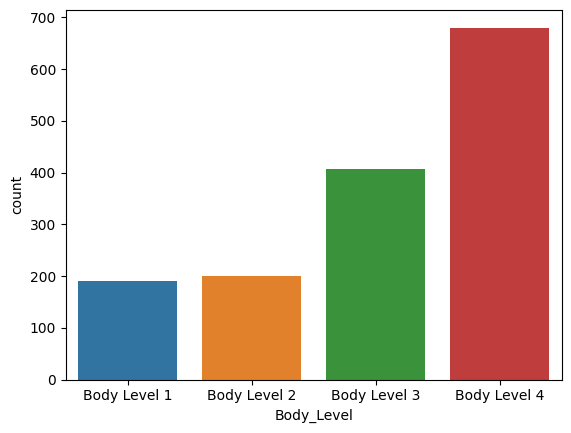

In [2]:
# visualize the classes and their distribution as %
sns.countplot(x='Body_Level', data=df)
plt.show()

In [3]:
def encode_categorical_features(df):
    code_value={

    "Body_Level":{
        "Body Level 1":1,
        "Body Level 2":2,
        "Body Level 3":3,
        "Body Level 4":4,
    },
    "Gender":{
        "Female":0,
        "Male":1
    },
    "H_Cal_Consump":{
        "no":0,
        "yes":1
    },
    "Alcohol_Consump":{
        "no":0,
        "Sometimes":1,
        "Frequently":2,
        "Always":3
    },
    "Smoking":{
        "no":0,
        "yes":1
    },
    "Food_Between_Meals":{
        "no":0,
        "Sometimes":1,
        "Frequently":2,
        "Always":3
    },
    "Fam_Hist":{
        "no":0,
        "yes":1
    },
    "H_Cal_Burn":{
        "no":0,
        "yes":1
    },
    "Transport":{
        "Public_Transportation":0,
        "Automobile":1,
        "Walking":2,
        "Bike":3,
        "Motorbike":4
    }
    }
    for col in df.columns:
        if col in code_value:
            df[col]=df[col].map(code_value[col])
    return df

    

In [4]:
# encode the categorical features
df_encoded = encode_categorical_features(df)

df_encoded.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,0,22.547298,1.722461,51.881263,1,2.663421,1.041110,0,0,3.000000,2,1,0,0.794402,1.391948,0,1
1,1,19.799054,1.743702,54.927529,1,2.000000,2.847264,1,0,3.289260,1,1,0,1.680844,2.000000,0,1
2,0,17.823438,1.708406,50.000000,1,1.642241,1.099231,1,0,3.452590,1,0,0,0.418875,1.000000,0,1
3,0,19.007177,1.690727,49.895716,1,1.212908,1.029703,1,0,3.207071,1,0,0,2.000000,1.000000,0,1
4,1,19.729250,1.793315,58.195150,1,2.508835,2.076933,0,0,3.435905,1,1,0,2.026668,1.443328,1,1


In [5]:
# Explore The data  # add the median value of each column to the DataFrame
df_encoded.describe()


,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,0.505078,24.290420,1.701602,86.542290,0.884225,2.421912,2.005120,0.728504,0.022343,2.682104,1.148274,0.817874,0.047393,1.023106,0.650672,0.308734,3.067028
std,0.500144,6.323081,0.094654,26.278277,0.320064,0.540711,0.620307,0.518055,0.147845,0.790751,0.474647,0.386079,0.212551,0.844840,0.605199,0.605540,1.052280
min,0.000000,15.000000,1.456346,39.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,19.895877,1.629194,65.000000,1.000000,2.000000,1.549931,0.000000,0.000000,2.644692,1.000000,1.000000,0.000000,0.145687,0.000000,0.000000,2.000000
50%,1.000000,22.720449,1.701284,82.636162,1.000000,2.416044,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.616045,0.000000,3.000000
75%,1.000000,26.000000,1.770278,106.690530,1.000000,3.000000,2.482933,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.672639,1.000000,1.000000,4.000000
max,1.000000,55.246250,1.980000,173.000000,1.000000,3.000000,3.000000,3.000000,1.000000,4.000000,3.000000,1.000000,1.000000,3.000000,2.000000,4.000000,4.000000


In [6]:
# Check if any of the features are skewed 
# negative values indicate that the feature is skewed to the left 
# positive values indicate that the feature is skewed to the right
# a value close to zero indicates that the feature is normally distributed
df_encoded.skew() 

Gender               -0.020333
Age                   1.481576
Height               -0.026199
Weight                0.263981
H_Cal_Consump        -2.404184
Veg_Consump          -0.482316
Water_Consump        -0.100632
Alcohol_Consump      -0.208836
Smoking               6.470351
Meal_Count           -1.059333
Food_Between_Meals    1.866960
Fam_Hist             -1.648912
H_Cal_Burn            4.264585
Phys_Act              0.464398
Time_E_Dev            0.635904
Transport             2.588752
Body_Level           -0.797732
dtype: float64

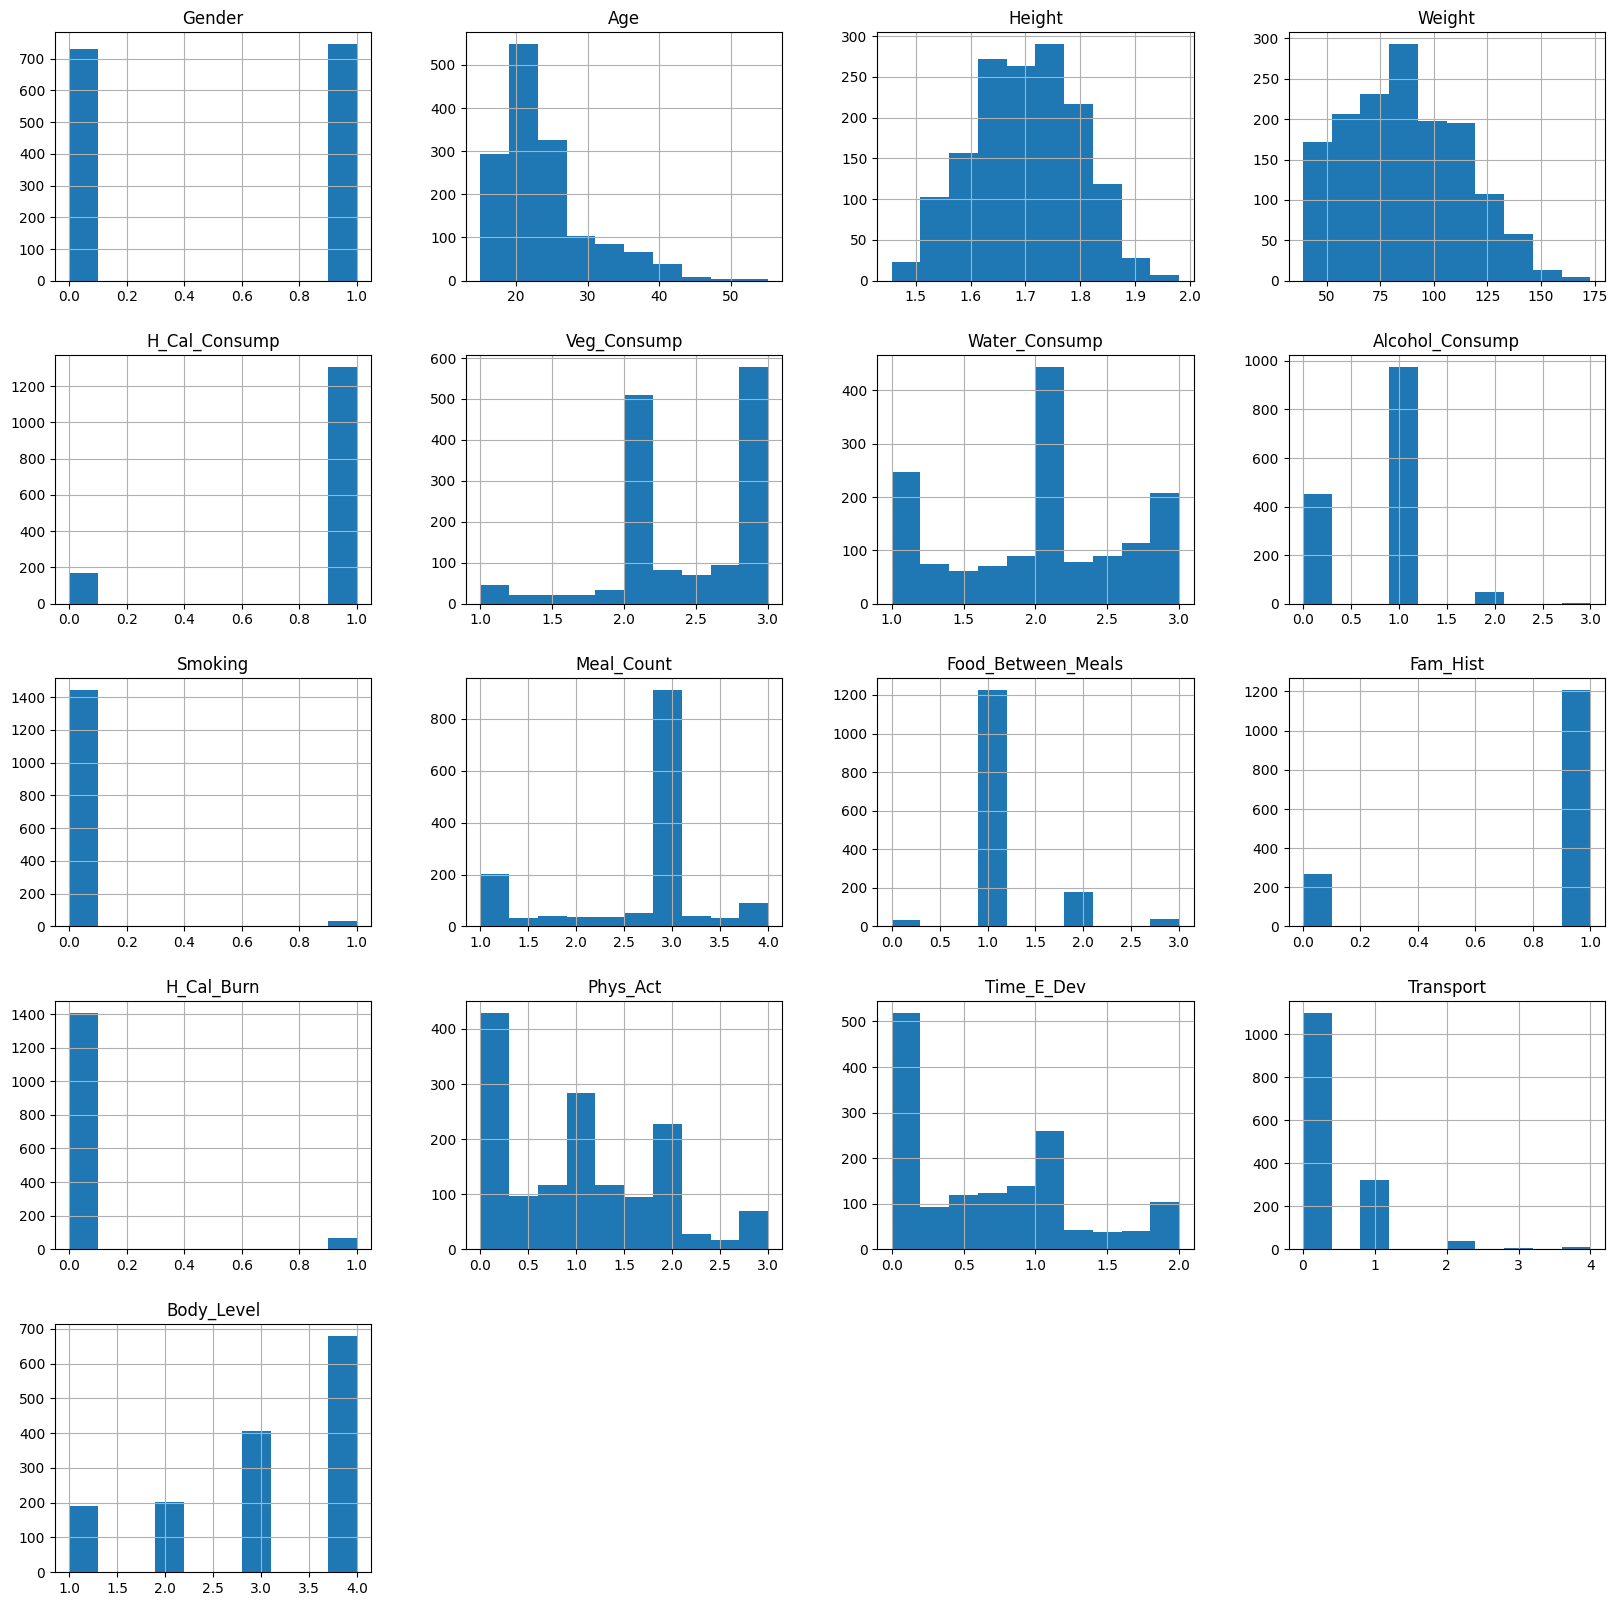

In [7]:
# visualize the distribution of the features using a histogram within each class
df_encoded.hist(figsize=(20, 20))
plt.show()
    

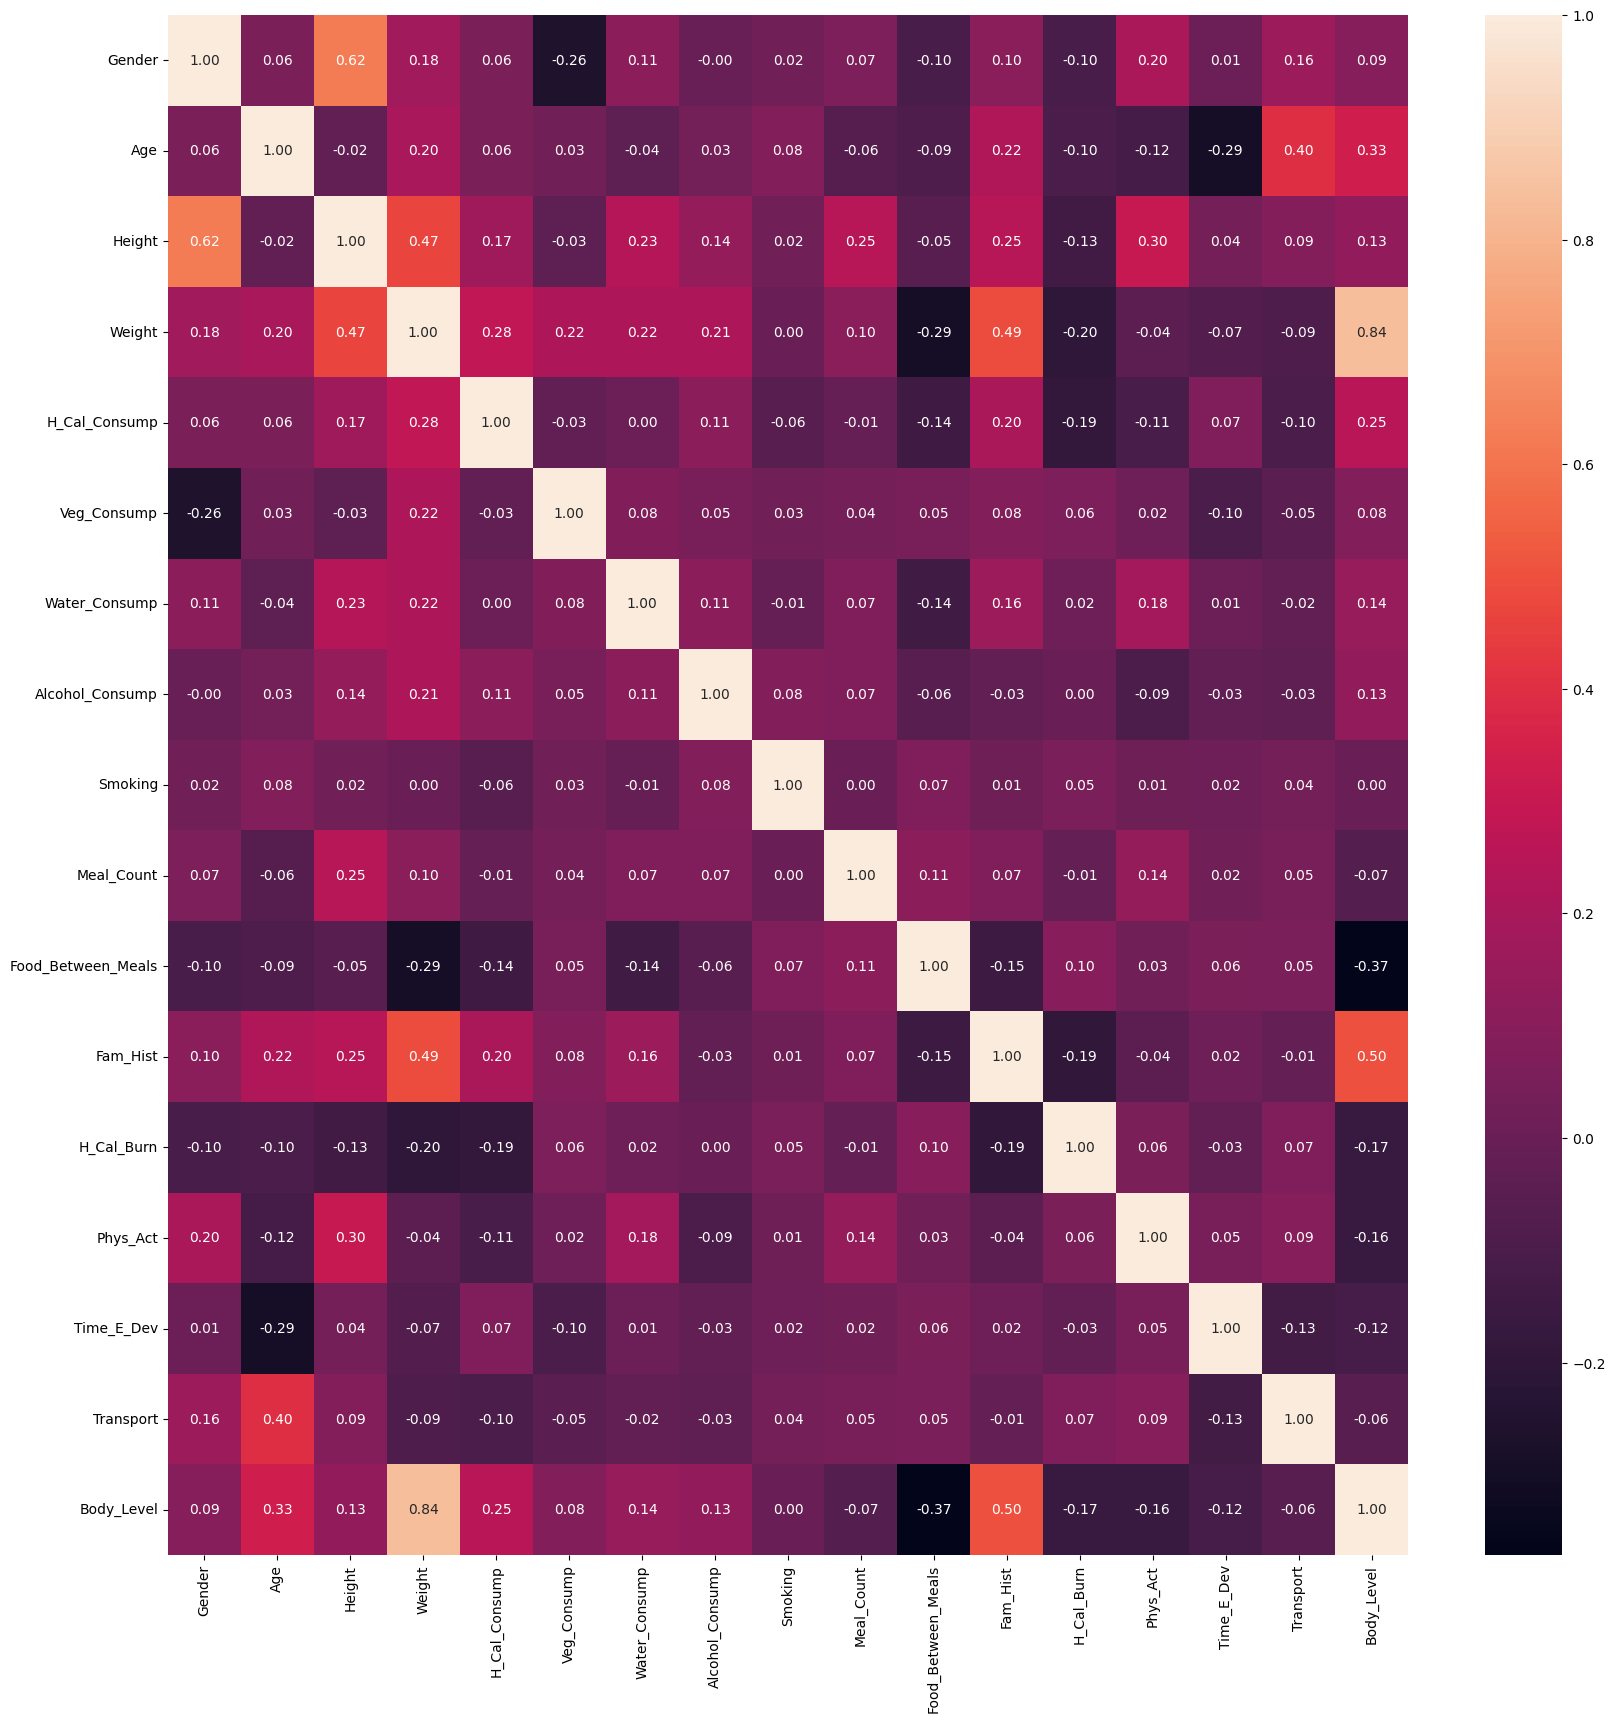

In [8]:
# Exploring the data 
# visualize the correlation between the features

# add BMI to the DataFrame
# df_encoded['BMI'] = df_encoded['Weight'] / (df_encoded['Height']) ** 2


plt.figure(figsize=(20, 20))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f')
plt.show()



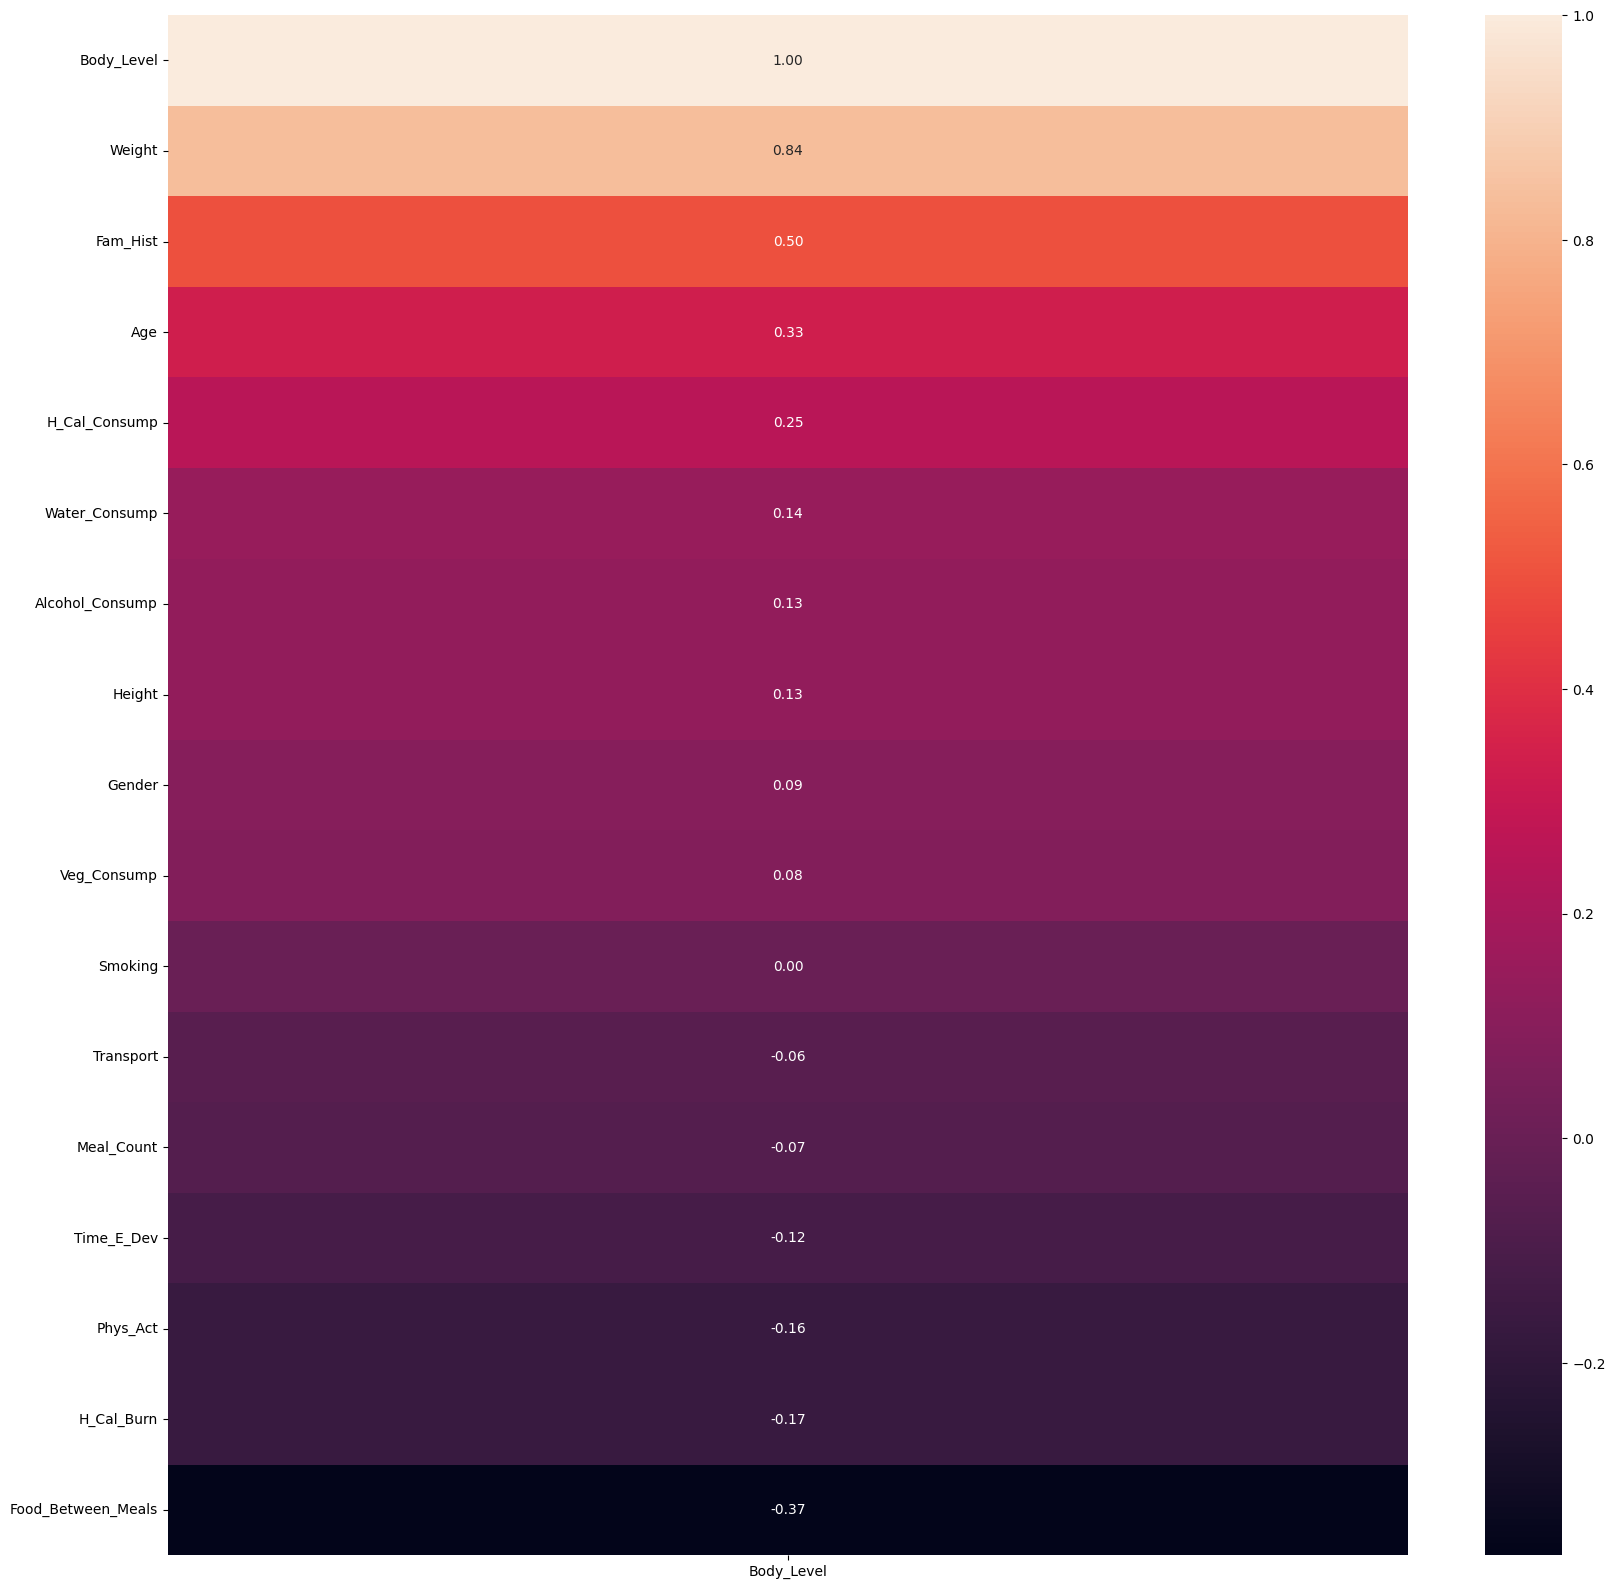

In [9]:
# visualize the correlation between the features and the target variable
plt.figure(figsize=(20, 20))
sns.heatmap(df_encoded.corr()[['Body_Level']].sort_values(by='Body_Level', ascending=False), annot=True, fmt='.2f')
plt.show()


# The most correlated features with the target variable are:
# BMI
# Weight
# Age
# Food_Between_Meals
# Water_Consumption
# Alcohol_Consumption


Train set
4    0.460627
3    0.274344
2    0.136325
1    0.128704
Name: Body_Level, dtype: float64
Test set
4    0.459459
3    0.277027
2    0.135135
1    0.128378
Name: Body_Level, dtype: float64


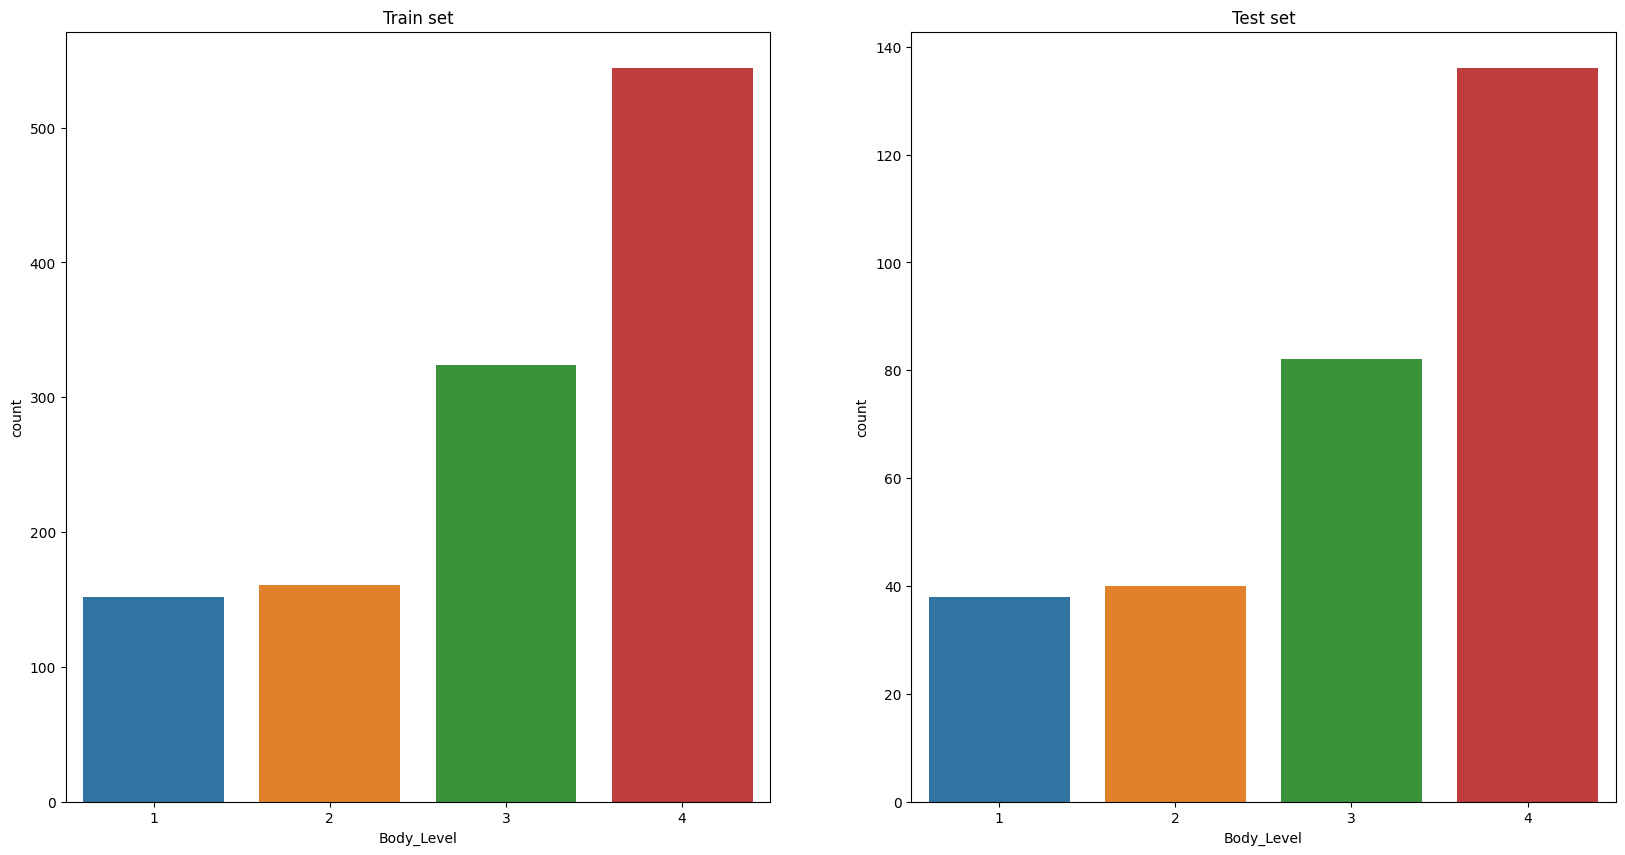

In [10]:
X = df_encoded.drop('Body_Level', axis=1)
y = df_encoded['Body_Level']


# split unbalanced data into train and test sets using stratification sampling
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in sss.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# check the distribution of the classes in the train and test sets
print('Train set')
print(y_train.value_counts(normalize=True))
print('Test set')
print(y_test.value_counts(normalize=True))


# Visualize the distribution of the classes in the train and test sets
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(x=y_test, ax=ax[1])
ax[1].set_title('Test set')
plt.show()
    
    

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def train_model(model, X_train, y_train):
    # train the model
    model.fit(X_train, y_train)

    # return the trained model
    return model

def predict(model, X_test, y_test):
    # make predictions using the trained model
    y_pred = model.predict(X_test)

    # return the predictions
    return y_pred

def evaluate_model(y_test, y_pred):
    # calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # calculate the precision score
    precision = precision_score(y_test, y_pred, average='weighted')

    # calculate the recall score
    recall = recall_score(y_test, y_pred, average='weighted')

    # calculate the f1 score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # return the evaluation metrics
    return accuracy, precision, recall, f1

/home/khaldon/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


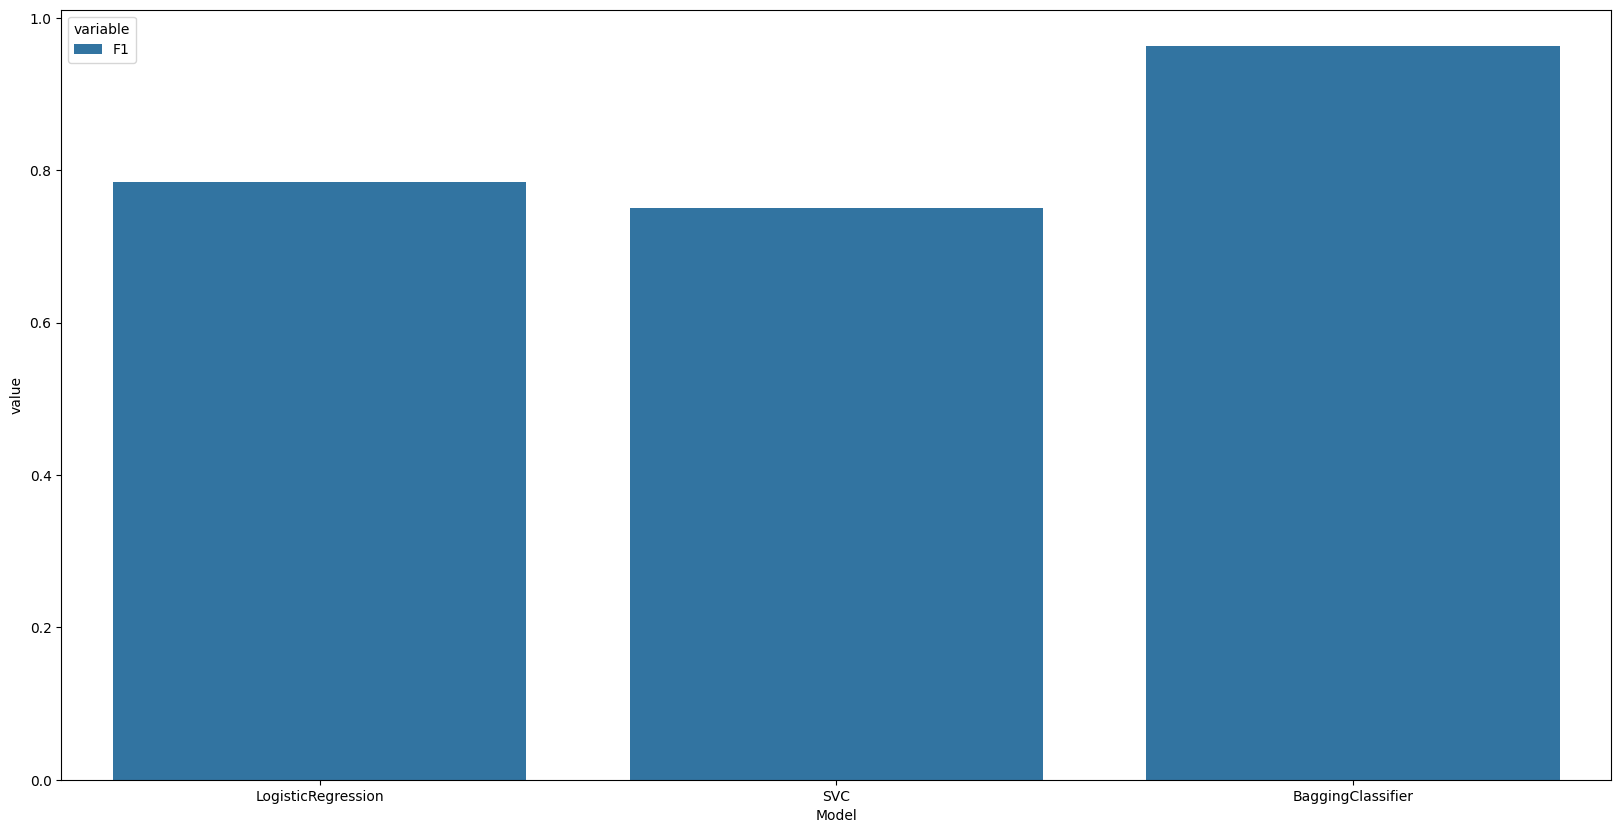

Model        BaggingClassifier
Accuracy              0.962838
Precision             0.962341
Recall                0.962838
F1                    0.962434
Name: 2, dtype: object


In [12]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# IMPORT BAGGED DESCISION TREE
from sklearn.ensemble import BaggingClassifier

# create a list of models
models = [
    LogisticRegression(),
    SVC(),
    BaggingClassifier(DecisionTreeClassifier(), max_features=0.7, max_samples= 0.6, n_estimators= 50),
]


# create a list to store the model names
model_names = []

# create a list to store the accuracy scores
accuracy_scores = []

# create a list to store the precision scores
precision_scores = []

# create a list to store the recall scores
recall_scores = []

# create a list to store the f1 scores
f1_scores = []

# loop over the models
for model in models:
    # train the model
    trained_model = train_model(model, X_train, y_train)

    # make predictions using the trained model
    y_pred = predict(trained_model, X_test, y_test)

    # evaluate the model
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

    # append the model name to model_names
    model_names.append(model.__class__.__name__)

    # append the accuracy score to accuracy_scores
    accuracy_scores.append(accuracy)

    # append the precision score to precision_scores
    precision_scores.append(precision)

    # append the recall score to recall_scores
    recall_scores.append(recall)

    # append the f1 score to f1_scores
    f1_scores.append(f1)
    

# create a DataFrame to store the evaluation metrics
df_scores = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores
})

# sort the DataFrame by the F1 score in descending order
df_scores.sort_values(by='F1', ascending=False)

# visualize the evaluation metrics
plt.figure(figsize=(20, 10))
sns.barplot(x='Model', y='value', hue='variable', data=pd.melt(df_scores, id_vars='Model', value_vars=[ 'F1']))
plt.show()


# Print the best model
print(df_scores.sort_values(by='F1', ascending=False).iloc[0])





In [13]:
# Apply OVERSAMPLING to the training data
from imblearn.over_sampling import BorderlineSMOTE

def oversample(X_train, y_train):
    # create an instance of BorderlineSMOTE
    sm = BorderlineSMOTE(random_state=42)

    # fit the training data to the SMOTE instance
    X_train_ros, y_train_ros = sm.fit_resample(X_train, y_train)

    # return the oversampled data
    return X_train_ros, y_train_ros


def run(X_train_ros, y_train_ros, X_test, y_test, model):
  

    # create a list to store the accuracy scores
    accuracy_scores_ros = []

    # create a list to store the precision scores
    precision_scores_ros = []

    # create a list to store the recall scores
    recall_scores_ros = []

    # create a list to store the f1 scores
    f1_scores_ros = []

    # loop over the models
    for model in models:
        # train the model
        trained_model = train_model(model, X_train_ros, y_train_ros)

        # make predictions using the trained model
        y_pred = predict(trained_model, X_test, y_test)

        # evaluate the model
        accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

        # append the accuracy score to accuracy_scores
        accuracy_scores_ros.append(accuracy)

        # append the precision score to precision_scores
        precision_scores_ros.append(precision)

        # append the recall score to recall_scores
        recall_scores_ros.append(recall)

        # append the f1 score to f1_scores
        f1_scores_ros.append(f1)
        

    # create a DataFrame to store the evaluation metrics
    df_scores_ros = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracy_scores_ros,
        'Precision': precision_scores_ros,
        'Recall': recall_scores_ros,
        'F1': f1_scores_ros
    })

    # sort the DataFrame by the F1 score in descending order
    df_scores_ros.sort_values(by='F1', ascending=False)

    # visualize the evaluation metrics
    # plt.figure(figsize=(20, 10))
    # sns.barplot(x='Model', y='value', hue='variable', data=pd.melt(df_scores_ros, id_vars='Model', value_vars=[ 'F1']))
    # plt.show()


    # Print the best model
    print(df_scores_ros.sort_values(by='F1', ascending=False).iloc[0])
    


In [22]:
X_train_ros, y_train_ros = oversample(X_train, y_train)
run(X_train_ros, y_train_ros, X_test, y_test, models)

/home/khaldon/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model        BaggingClassifier
Accuracy              0.976351
Precision             0.976865
Recall                0.976351
F1                    0.976294
Name: 2, dtype: object


In [15]:
# # Grid Search for the BaggingClassifier model
# from sklearn.model_selection import GridSearchCV
# # create a list of hyperparameters
# hyperparameters = {
#     'n_estimators': [10, 20, 30, 40, 50],
#     'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
#     'max_features': [0.5, 0.6, 0.7, 0.8, 0.9]
# }

# # create a GridSearchCV instance
# grid = GridSearchCV(BaggingClassifier(), hyperparameters, cv=5, verbose=1)

# # train the model
# best_model = grid.fit(X_train_ros, y_train_ros)

# # print the best hyperparameters
# print('Best Hyperparameters:\n', best_model.best_params_)

# # print the best score
# print('Best Score:\n', best_model.best_score_)

# # make predictions using the best model
# y_pred = best_model.predict(X_test)

# # evaluate the model
# accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)


    
# # print the evaluation metrics
# print('Accuracy: ', accuracy)
# print('Precision: ', precision)
# print('Recall: ', recall)
# print('F1: ', f1)



In [16]:
# # Try to keep only the most important features
# # create a list of features

# print(best_model.best_score_)